# Logistic Regression
In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

For Example: spam detection for emails, predicting if a customer will default in a loan, etc.

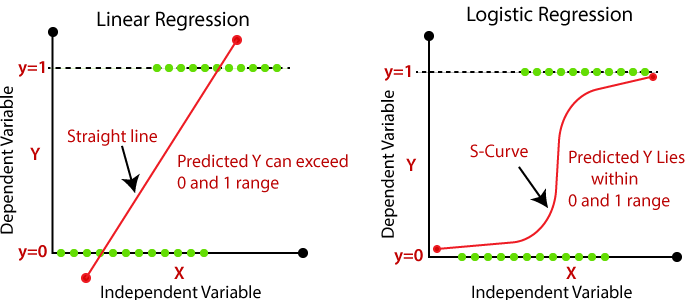

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Exploring Dataset

In [3]:
data = data[['pclass', 'sex', 'age', 'survived']]
data.shape

(1310, 4)

In [4]:
data.describe()

,pclass,age,survived
count,1309.000000,1046.000000,1309.000000
mean,2.294882,29.881135,0.381971
std,0.837836,14.413500,0.486055
min,1.000000,0.166700,0.000000
25%,2.000000,21.000000,0.000000
50%,3.000000,28.000000,0.000000
75%,3.000000,39.000000,1.000000
max,3.000000,80.000000,1.000000


In [5]:
data.head()

,pclass,sex,age,survived
0,1.0,female,29.0000,1.0
1,1.0,male,0.9167,1.0
2,1.0,female,2.0000,0.0
3,1.0,male,30.0000,0.0
4,1.0,female,25.0000,0.0


In [6]:
data.tail()

,pclass,sex,age,survived
1305,3.0,female,NaN,0.0
1306,3.0,male,26.5,0.0
1307,3.0,male,27.0,0.0
1308,3.0,male,29.0,0.0
1309,NaN,NaN,NaN,NaN


In [7]:
#Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis=0))

pclass        1
sex           1
age         264
survived      1
dtype: int64


## Preprocessing: 
#### Dealing with missing values

In [8]:
# Dropping rows with Nan
data = data.dropna(subset=['sex', 'pclass', 'survived'])

In [9]:
print(data.isna().sum(axis=0))

pclass        0
sex           0
age         263
survived      0
dtype: int64


In [10]:
data.tail()

,pclass,sex,age,survived
1304,3.0,female,14.5,0.0
1305,3.0,female,NaN,0.0
1306,3.0,male,26.5,0.0
1307,3.0,male,27.0,0.0
1308,3.0,male,29.0,0.0


### Label Encoding
`male`, `female` to binary

In [11]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['sex']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int64

### Feature Extraction

In [12]:
features = data[['sex', 'age', 'pclass']]
target = data[['survived']]
features.head()

,sex,age,pclass
0,0,29.0000,1.0
1,1,0.9167,1.0
2,0,2.0000,1.0
3,1,30.0000,1.0
4,0,25.0000,1.0


In [13]:
target.head()

,survived
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


### Imputation | Missing vaues in age
Since there are so many missing values in age, we will impute the coloumn

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features = imputer.fit_transform(features)

In [16]:
features

array([[ 0.    , 29.    ,  1.    ],
       [ 1.    ,  0.9167,  1.    ],
       [ 0.    ,  2.    ,  1.    ],
       ...,
       [ 1.    , 26.5   ,  3.    ],
       [ 1.    , 27.    ,  3.    ],
       [ 1.    , 29.    ,  3.    ]])

### Splitting

In [20]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target)

## Trainng

In [21]:
model = LogisticRegression()
model.fit(feature_train, target_train)
predictions = model.predict(feature_test)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Printing an Error Matrix and Accuracy Score
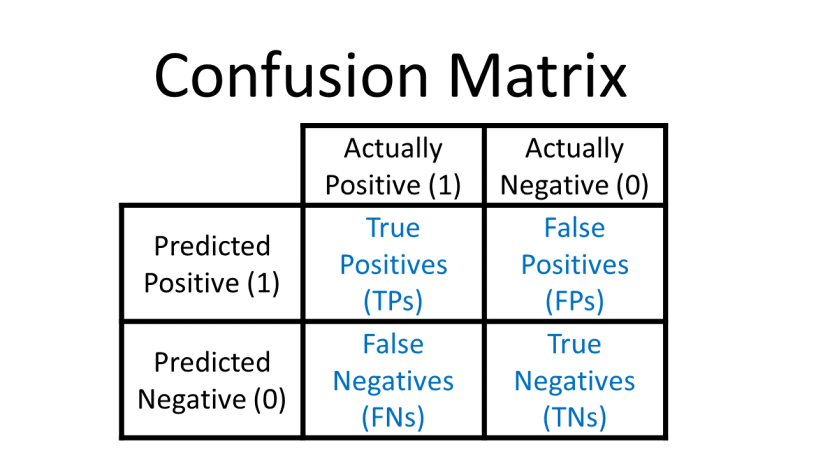

In [22]:
print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

[[175  30]
 [ 36  87]]
0.7987804878048781
